In [4]:
import sys
!{sys.executable} -m pip install opencv-python

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import cv2  

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 975.2 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 1.0 MB/s eta 0:00:38
   ---------------------------------------- 0.2/38.8 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.4/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:36
    --------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:38
    --------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:39
    -------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

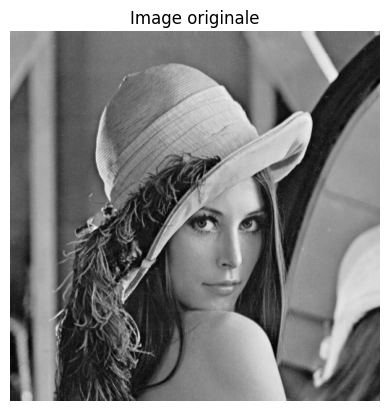

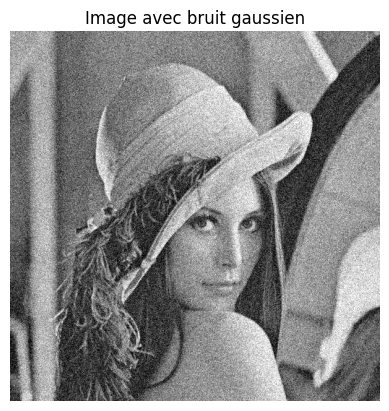

PSNR entre l'image originale et l'image bruitée :  20.067417282578486
PSNR avec sigmaColor=10 : 20.882462946374613
PSNR avec sigmaColor=25 : 24.2952159934285
PSNR avec sigmaColor=50 : 28.158012353333515
PSNR avec sigmaColor=75 : 28.54505699192824
PSNR avec sigmaColor=100 : 28.145613571618718
PSNR avec sigmaColor=125 : 27.772585354540876
PSNR avec sigmaColor=150 : 27.504264200574884


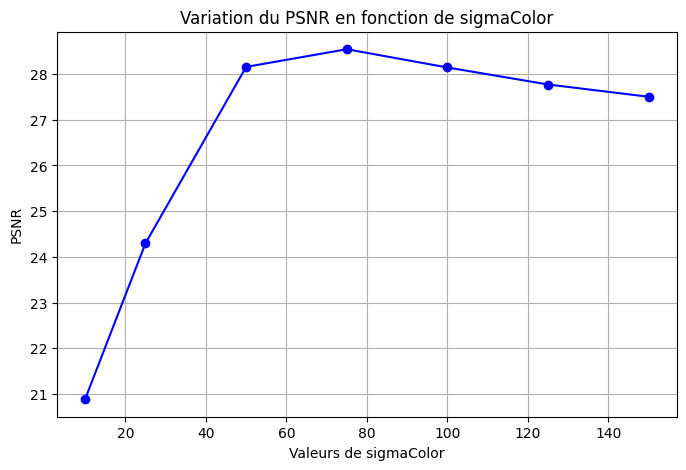

In [ ]:

image = import_image("lena.pgm")
display_image(image, "Image originale")

image = image / 255.0

noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)  
display_image(image_noised, 'Image avec bruit gaussien')

psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

sigma_colors = [10, 25, 50, 75, 100, 125, 150]  
sigma_space = 75  
psnr_values = []

for sigmaColor in sigma_colors:
    image_noised_uint8 = (image_noised * 255).astype(np.uint8)

    image_filtree = cv2.bilateralFilter(image_noised_uint8, d=9, sigmaColor=sigmaColor, sigmaSpace=sigma_space)

    psnr_val = psnr(image * 255, image_filtree)
    psnr_values.append(psnr_val)
    print(f"PSNR avec sigmaColor={sigmaColor} : {psnr_val}")

plt.figure(figsize=(8, 5))
plt.plot(sigma_colors, psnr_values, marker='o', linestyle='-', color='b')
plt.xlabel("Valeurs de sigmaColor")
plt.ylabel("PSNR")
plt.title("Variation du PSNR en fonction de sigmaColor")
plt.grid()
plt.show()
